# Die rolling in Notebooks

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
# This will get us in trouble later
N_SIDES = 6

In [3]:
# We can now define a function in here, that can be used in future cells
def roll_n_dice(n_dice: int) -> int:
    """Rolls N six-sided die and returns the total rolled"""
    # Warning -- this will lead us into danger!
    rolls = [random.randint(1, N_SIDES) for _ in range(n_dice)]
    return sum(rolls)

One of the things that Jupyter notebooks allow us to do really well is quickly visualize the result of our code. This example is a little bit contrived, but we can ask "what are the most common number that occurs if you roll two dice?"

Of course, the avid Euro-gamers among you already know the answer is 7 =)

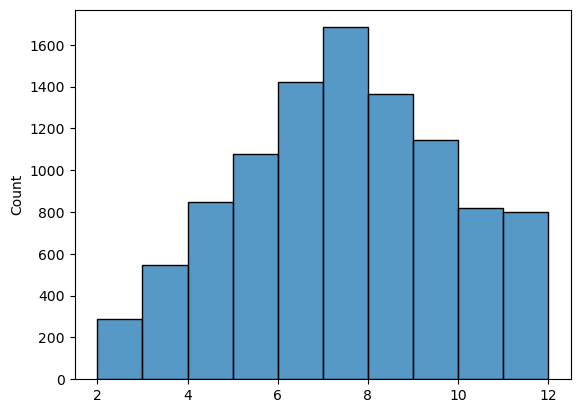

In [4]:
# simulate rolling many times 
many_rolls = [roll_n_dice(n_dice=2) for _ in range(10000)]
sns.histplot(many_rolls, binwidth=1);

Let's suppose we were making a game of our own that is based on die rolls.

We might be curious if rolling 20 d6s (d6=a 6-sided die), and 6 d20s (d20=a 20-sided die)  in terms of results of the rolls. Can we just swap them interchangably?

<Axes: ylabel='Count'>

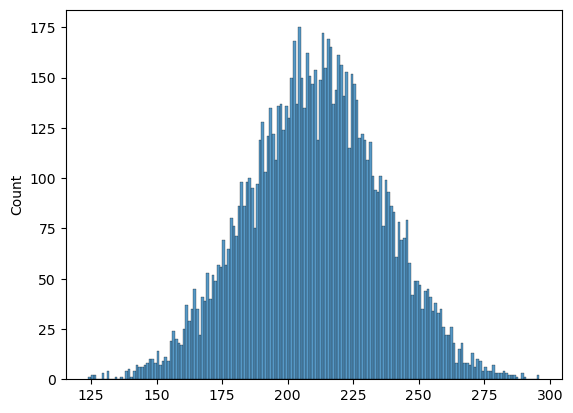

In [9]:
outcomes_roll_20_d6 = [
    roll_n_dice(n_dice=20) for _ in range(10000)
]
sns.histplot(outcomes_roll_20_d6, binwidth=1)

<Axes: ylabel='Count'>

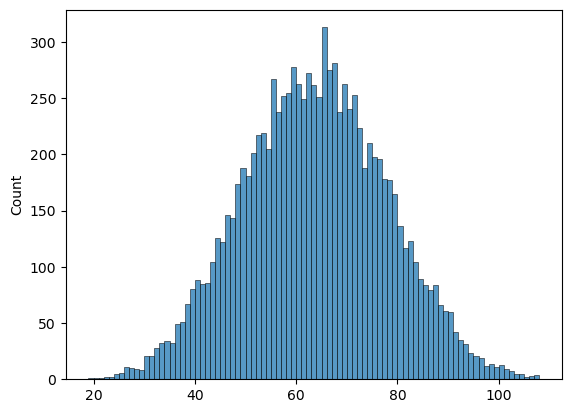

In [6]:
N_SIDES=20   # change to 20 sided dice

outcomes_roll_6_d20 = [
    roll_n_dice(n_dice=6) for _ in range(10000)
]
sns.histplot(outcomes_roll_6_d20, binwidth=1)

We can compare these on the same axis:

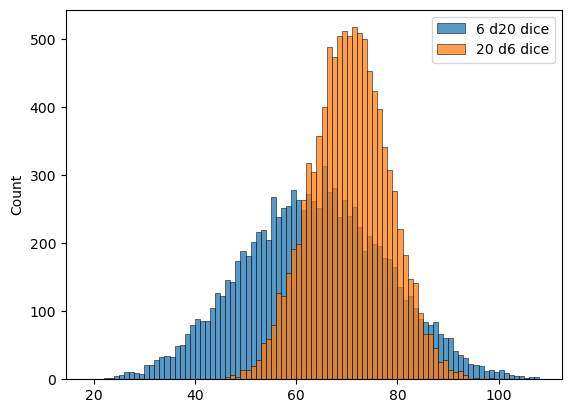

In [8]:
sns.histplot(outcomes_roll_6_d20, binwidth=1, label="6 d20 dice")
sns.histplot(outcomes_roll_20_d6, binwidth=1, label="20 d6 dice")
plt.legend();

In [ ]:
# Let's redefine the function
def roll_n_dice(n_dice: int, n_sides: int=6) -> int:
    """Rolls n_dice dice, each die has n_sides, and returns the total"""
    rolls = [random.randint(1, n_sides) for _ in range(n_dice)]
    return sum(rolls)

As a benefit, our code is a lot more explicit when asking what the difference is:

In [ ]:
outcomes_roll_20_six_sided_dice = [
    roll_n_dice(n_dice=20, n_sides=6) for _ in range(10000)
]
outcomes_roll_6_twenty_sided_dice = [
    roll_n_dice(n_dice=6, n_sides=20) for _ in range(10000)
]

sns.histplot(outcomes_roll_6_twenty_sided_dice, binwidth=1, label="6 twenty-sided die")
sns.histplot(outcomes_roll_20_six_sided_dice, binwidth=1, label="20 six-sided die")
plt.legend();

## Getting the best of both worlds

In [ ]:
import dice

outcomes_roll_20_six_sided_dice = [
    dice.roll_n_d6(n_dice=20) for _ in range(10000)
]
outcomes_roll_6_twenty_sided_dice = [
    dice.roll_n_dice(n_dice=6, n_sides=20) for _ in range(10000) # can also use dice.roll_n_d20, but showing we can be flexible in the notebook
]

sns.histplot(outcomes_roll_6_twenty_sided_dice, binwidth=1, label="6 twenty-sided die")
sns.histplot(outcomes_roll_20_six_sided_dice, binwidth=1, label="20 six-sided die")
plt.legend();

We can now make our observations about the output (e.g. mean is higher for the 20 d6s, and the outputs are more tightly clumped).

This allows us to use notebooks for what they excel at -- mixing explanations, exploration, and visualizations -- while allowing us to continue using the same tools and software design principles for the functions and logic we are using.